In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import kaggle

# Importing data

In [2]:
!kaggle datasets download -d ccanb23/iea-monthly-electricity-statistics

iea-monthly-electricity-statistics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zipfile_name = 'iea-monthly-electricity-statistics.zip'
with zipfile.ZipFile(zipfile_name,'r') as file:
    file.extractall()

df = pd.read_csv('data.csv')

# OECD Analysis

In [4]:
df.drop(['CODE_TIME', 'TIME', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate'], axis=1, inplace=True)
df['DATETIME'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(day=1))
df_OECD = df.loc[(df['COUNTRY'] == 'OECD Europe')]

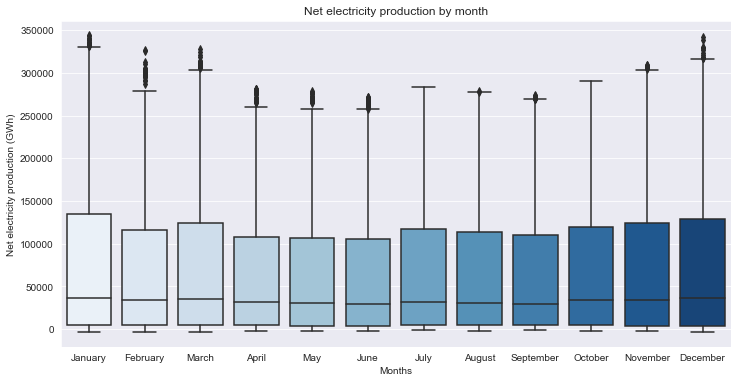

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_OECD, x='MONTH_NAME', y='VALUE', palette='Blues')
ax.set_title('Net electricity production by month')
ax.set_ylabel('Net electricity production (GWh)')
ax.set_xlabel('Months')
plt.show()

Text(0.5, 0, 'Time')

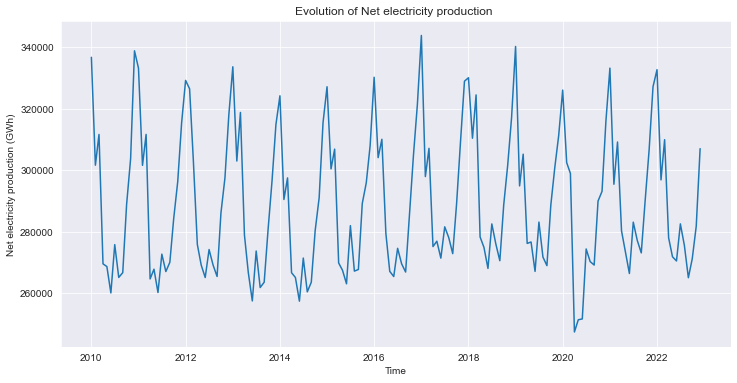

In [17]:
data_net = df_OECD.loc[(df['PRODUCT']=='Net electricity production')]
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=data_net[['DATETIME','VALUE']], x='DATETIME', y='VALUE')
ax.set_title('Evolution of Net electricity production ')
ax.set_ylabel('Net electricity production (GWh)')
ax.set_xlabel('Time')

Text(0.5, 0, 'Month')

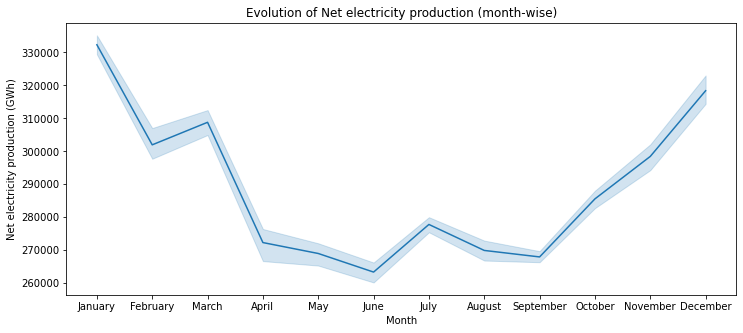

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=data_net[['MONTH_NAME','VALUE']], x='MONTH_NAME', y='VALUE')
ax.set_title('Evolution of Net electricity production (month-wise)')
ax.set_ylabel('Net electricity production (GWh)')
ax.set_xlabel('Month')

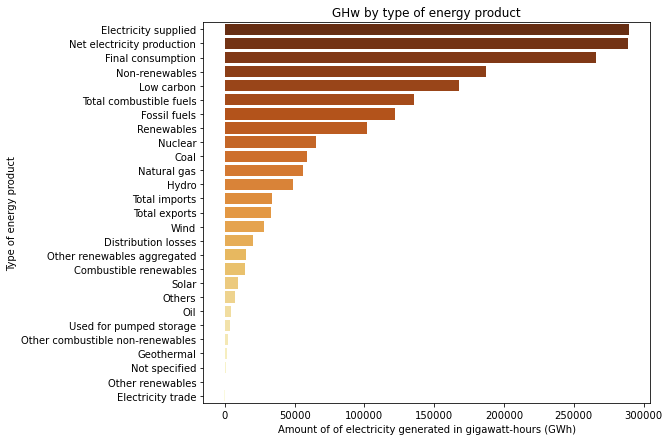

In [13]:
order = df_OECD.groupby('PRODUCT').mean()['VALUE'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(data=df_OECD, x='VALUE', y='PRODUCT', ax=ax, estimator=np.mean, errorbar=('ci', 0), order=order, palette='YlOrBr_r')
ax.set_title('GHw by type of energy product')
ax.set_xlabel('Amount of of electricity generated in gigawatt-hours (GWh)')
ax.set_ylabel('Type of energy product')
plt.show()

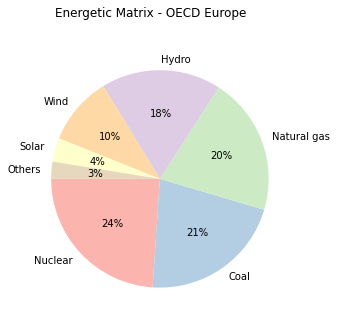

In [9]:
type_pro = ['Wind', 'Solar', 'Other renew. agg.', 'Others', 'Nuclear', 'Natural gas', 'Hydro', 'Coal']
df_type_pro = df_OECD[df_OECD['PRODUCT'].isin(type_pro)]
matrix = df_type_pro.groupby('PRODUCT').sum()['VALUE'].sort_values(ascending=False)
labels = matrix.index

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Energetic Matrix - OECD Europe')
ax.pie(x=matrix, labels=labels, autopct='%.0f%%', rotatelabels=False,startangle=180, colors=sns.color_palette("Pastel1"));

## Country level Analysis

In [10]:
df['COUNTRY'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'IEA Total', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'OECD Americas',
       'OECD Asia Oceania', 'OECD Europe', 'OECD Total', 'Poland',
       'Portugal', 'Republic of Turkiye', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States', 'Colombia', 'Argentina', 'Brazil', 'Bulgaria',
       'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia',
       'Romania', 'Serbia', 'Costa Rica'], dtype=object)

In [11]:
c_euro = ['Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary','Iceland', 'Ireland',
       'Italy','Netherlands','Norway','Poland',
       'Portugal', 'Republic of Turkiye', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland','United Kingdom']